# ESAA 5기 김혜준 미니 프로젝트 (2)
- 관련 사이트 : https://dacon.io/competitions/open/235536/codeshare

- 과제 : 미니 프로젝트 (1) 결과물에 이어서, 한 학기동안 배운 모델들 중 하나 이상을 해당 데이터에 적합. 

- 조건 : 하이퍼 파라미터 튜닝 포함

* 전처리 등은 코드 공유란 등을 참고하시고, 한 학기 배운 내용을 활용해본다는 마음으로 큰 부담없이 진행해주세요!

* 분석 파일을 1) 제출 후 리더보드에서 점수 확인 2) github에 업로드하여 점수와 깃허브 링크를 과제함에 댓글로 달아주시면 됩니다. 점수 고득점자 3분에게 상품을 드릴 예정입니다! 

* 제출기한 : 2021.12.31 (금) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# Google Colab에 해당하여 생략함

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 불러오기
train = pd.read_csv("Project/movies_train.csv")
test = pd.read_csv("Project/movies_test.csv")
submission = pd.read_csv("Project/submission.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [7]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


## 2) 데이터 요약


In [8]:
print(train.shape)
print(test.shape)
print(submission.shape)

# pd.DataFrame.shape : 데이터 프레임의 행과 열의 개수가 저장되어 있는 속성

(600, 12)
(243, 11)
(243, 2)


* 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.

In [9]:
train.info()

# pd.DataFrame.info() : 열별 정보를 알려주는 함수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## 3) 데이터의 요약통계량 확인

In [11]:
pd.options.display.float_format = '{:.1f}'.format # 과학적 표현법(e) 사용하지 않고 소수점 첫째 자리까지만 표현

In [12]:
train.describe()

# pd.DataFrame.describe() : 숫자형 열들의 기술 통계량을 보여주는 함수

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [13]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.0,107.0,243.0,243.0,243.0
mean,109.8,891669.5,0.9,159.3,3.5
std,124.0,1217341.5,1.2,163.0,2.1
min,40.0,34.0,0.0,0.0,0.0
25%,91.0,62502.0,0.0,18.0,2.0
50%,104.0,493120.0,0.0,105.0,3.0
75%,114.5,1080849.6,1.0,282.0,4.0
max,2015.0,6173099.5,6.0,776.0,16.0


## 4) 결측치 확인 및 데이터 전처리


In [14]:
train.isna().sum() 

# pd.DataFrame.isna().sum() : 데이터 프레임 내 모든 열의 결측치 개수 계산
# True는 1, False는 0로 변환되어 결측치 개수 계산 가능

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [15]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [16]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [17]:
test[test['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5


In [18]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0
0


- train과 test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [19]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

# pd.DataFrame.fillna() : 결측치를 대신하여 넣고자 하는 값으로 지정한 열의 결측치를 대체하는 함수
# inplace = True : 원본 데이터를 수정 -> 원본 보존 X

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [20]:
train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

# pd.to_datetime() : datetime 오브젝트로 변환하는 함수

## 5) 데이터 시각화 및 분석

### 5-1) 영화 감독별 평균 관객수

#### 사용 변수 : director, box_off_num

In [21]:
# 영화 감독과 관객수를 추출하여 데이터프레임 생성

train_dir_box = train[['director', 'box_off_num']]
train_dir_box.info()
train_dir_box.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   director     600 non-null    object
 1   box_off_num  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


,director,box_off_num
0,조병옥,23398
1,우민호,7072501
2,장철수,6959083
3,구자홍,217866
4,신근호,483387


In [22]:
print(train_dir_box.director.is_unique) # False

# 한 명의 영화 감독이 여러 영화를 만든 경우가 존재 -> 감독별로 groupby 필요

False


In [23]:
train_dir_box.groupby('director').mean().sort_values('box_off_num', ascending = False)

# 영화 감독별로 groupby하여 평균 관객수 계산하고 내림차순 정렬

,box_off_num
director,
윤제균,14262766.0
최동훈,12845252.0
양우석,11374879.0
봉준호,9350351.0
한재림,9135806.0
...,...
진광교,36.0
이세일,10.0
고구마,8.0


- 윤제균, 최동훈, 양우석, 봉준호, 한재림 감독 순으로 평균 관객수가 많다.

### 5-2) 영화 개봉 요일별 평균 관객수
#### 사용 변수 : release_time, box_off_num

In [24]:
# release_time에서 요일 추출

train['release_weekday'] = train['release_time'].dt.day_name() # dt접근자 활용

# day_name() : 요일을 문자열로 추출

In [25]:
# 영화 제목, 감독, 개봉 요일과 관객수를 추출하여 데이터프레임 생성

train_weekday_box = train[['title', 'director', 'release_weekday', 'box_off_num']]
train_weekday_box.info()
train_weekday_box.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            600 non-null    object
 1   director         600 non-null    object
 2   release_weekday  600 non-null    object
 3   box_off_num      600 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.9+ KB


,title,director,release_weekday,box_off_num
0,개들의 전쟁,조병옥,Thursday,23398
1,내부자들,우민호,Thursday,7072501
2,은밀하게 위대하게,장철수,Wednesday,6959083
3,나는 공무원이다,구자홍,Thursday,217866
4,불량남녀,신근호,Thursday,483387


In [26]:
train_weekday_box.groupby('release_weekday').count()

# 요일별 개봉 영화 수 계산

,title,director,box_off_num
release_weekday,,,
Friday,2,2,2
Monday,4,4,4
Saturday,1,1,1
Thursday,484,484,484
Tuesday,2,2,2
Wednesday,107,107,107


- 목요일에 가장 많은 영화가 개봉했고, 수요일이 그 뒤를 이었다. 그리고 월, 화, 금, 토요일에 개봉한 영화는 소수이다. 이때, 일요일에 개봉한 영화는 없다.
- 보통 목요일에 영화를 개봉하는 관례에 의한 결과라고 볼 수 있다. 몇몇 다른 요일에 개봉한 경우는 휴일이나 연휴를 고려한 것이라고 해석할 수 있다.

In [27]:
train_weekday_box.groupby('release_weekday').mean().sort_values('box_off_num', ascending = False)

# 요일별로 groupby하여 평균 관객수 계산하고 내림차순 정렬

,box_off_num
release_weekday,
Tuesday,2591569.0
Wednesday,2237699.1
Thursday,372299.0
Friday,48651.0
Monday,434.0
Saturday,353.0


- 개봉 요일이 화, 수, 목, 금, 월, 토요일인 순으로 평균 관객수가 많다.

<AxesSubplot:xlabel='release_weekday'>

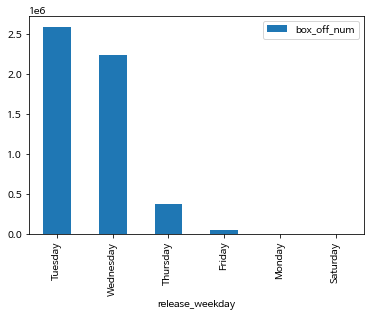

In [28]:
# 영화 개봉 요일별 평균 관객수 막대 그래프 그리기

train_weekday_box.groupby('release_weekday').mean().sort_values('box_off_num', ascending=False).plot(kind = 'bar')

In [29]:
train_weekday_box[train_weekday_box['release_weekday'] == 'Tuesday'] # 화요일에 개봉한 영화

,title,director,release_weekday,box_off_num
288,타워,김지훈,Tuesday,5181014
302,원 나잇 스탠드,민용근,Tuesday,2124


- 화요일에 2개의 영화 밖에 개봉하지 않았으므로, 평균 관객수를 해석할 때 주의가 필요하다.
- '타워'라는 영화의 높은 관객수로 인해 화요일의 평균 관객수가 가장 높게 나타났음을 알 수 있다.

### 5-3) 영화 장르별 평균 주연 배우 수
#### 사용 변수: genre, num_actor

In [30]:
# 영화 장르와 주연 배우 수를 추출하여 데이터프레임 생성

train_genre_actor = train[['genre', 'num_actor']]
train_genre_actor.info()
train_genre_actor.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre      600 non-null    object
 1   num_actor  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


,genre,num_actor
0,액션,2
1,느와르,3
2,액션,4
3,코미디,6
4,코미디,2


In [31]:
train_genre_actor.groupby('genre').mean().sort_values('num_actor', ascending = False)

# 영화 장르별로 groupby하여 평균 주연 배우 수 계산하고 내림차순 정렬

,num_actor
genre,
애니메이션,5.7
코미디,4.7
공포,3.9
SF,3.7
드라마,3.6
액션,3.6
느와르,3.6
멜로/로맨스,3.4
다큐멘터리,3.3


Text(0, 0.5, '평균 주연 배우 수')

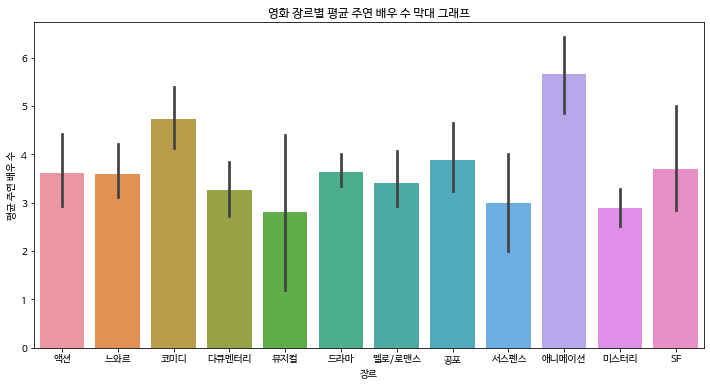

In [32]:
# 영화 장르별 평균 주연 배우 수 막대 그래프 그리기

ax = plt.subplots(figsize = (12, 6))
ax = sns.barplot(x = 'genre', y = 'num_actor', data = train_genre_actor)
ax.set_title("영화 장르별 평균 주연 배우 수 막대 그래프")
ax.set_xlabel("장르")
ax.set_ylabel("평균 주연 배우 수")

- 애니메이션, 코미디, 공포, SF, 드라마 등의 순서로 평균 주연 배우가 많다. 가장 평균 주연 배우 수가 적은 장르는 뮤지컬이다.

### 5-4) 상위 5개 배급사별 가장 선호하는 영화 장르
#### 사용 변수: distributor, genre

In [33]:
# 영화 배급사와 장르를 추출하여 데이터프레임 생성

train_dist_genre = train[['distributor', 'genre']]
train_dist_genre.info()
train_dist_genre.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   distributor  600 non-null    object
 1   genre        600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


,distributor,genre
0,롯데엔터테인먼트,액션
1,(주)쇼박스,느와르
2,(주)쇼박스,액션
3,(주)NEW,코미디
4,쇼박스(주)미디어플렉스,코미디


In [34]:
train_dist_genre.groupby(['distributor']).count().sort_values('genre', ascending = False)

# 배급사별 배급한 영화 개수 계산하여 내림차순 정렬

,genre
distributor,
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,30
(주)마운틴픽쳐스,29
(주)쇼박스,26
...,...
새인컴퍼니,1
상구네 필름,1
사람과 사람들,1


- CJ 엔터테인먼트, 롯데엔터테인먼트, (주)NEW, (주)마운틴픽쳐스, (주)쇼박스 순으로 많은 영화를 배급했다.

In [35]:
# 상위 5개 배급사 데이터만 추출

top_5_dist = train[(train['distributor'] == 'CJ 엔터테인먼트')|(train['distributor'] == '롯데엔터테인먼트')|(train['distributor'] == '(주)NEW')|(train['distributor'] == '(주)마운틴픽쳐스')|(train['distributor'] == '(주)쇼박스')]
top_5_dist.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,Thursday
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,Thursday
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,Wednesday
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,Thursday
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211,Thursday


In [36]:
# 상위 5개 배급사 데이터에서 영화 장르와 배급사, 영화 제목을 추출하여 데이터프레임 생성

top_5_dist_2 = top_5_dist[['distributor', 'genre', 'title']]
top_5_dist_2.head()

,distributor,genre,title
0,롯데엔터테인먼트,액션,개들의 전쟁
1,(주)쇼박스,느와르,내부자들
2,(주)쇼박스,액션,은밀하게 위대하게
3,(주)NEW,코미디,나는 공무원이다
5,롯데엔터테인먼트,코미디,강철대오 : 구국의 철가방


In [37]:
top_5_dist_2.groupby(['distributor', 'genre']).count().sort_values('title', ascending = False)

# 각 배급사에서 장르별 영화 수 계산

title
distributor genre        
CJ 엔터테인먼트   드라마        20
(주)NEW      드라마        16
롯데엔터테인먼트    드라마        14
(주)마운틴픽쳐스   드라마        11
(주)쇼박스      드라마         8
            느와르         8
(주)마운틴픽쳐스   다큐멘터리       8
롯데엔터테인먼트    코미디         8
            멜로/로맨스      8
CJ 엔터테인먼트   멜로/로맨스      6
롯데엔터테인먼트    공포          6
(주)마운틴픽쳐스   멜로/로맨스      5
CJ 엔터테인먼트   코미디         5
            공포          5
롯데엔터테인먼트    액션          5
(주)쇼박스      액션          5
CJ 엔터테인먼트   느와르         4
            액션          4
            애니메이션       4
            SF          3
(주)NEW      코미디         3
CJ 엔터테인먼트   미스터리        3
롯데엔터테인먼트    느와르         3
            미스터리        3
            애니메이션       3
(주)쇼박스      코미디         2
(주)NEW      공포          2
(주)쇼박스      멜로/로맨스      2
(주)마운틴픽쳐스   코미디         2
            미스터리        2
(주)NEW      액션          2
            멜로/로맨스      2
            느와르         2
(주)쇼박스      공포          1
롯데엔터테인먼트    SF          1
(주)마운틴픽쳐스   공포          1
롯데엔터테인먼트    다큐멘터리       1
(주)NEW      애니메이션       1
            다큐멘터리       1
            SF          1

- CJ 엔터테인먼트, 롯데엔터테인먼트, (주)NEW, (주)마운틴픽쳐스, (주)쇼박스 모두 '드라마' 장르의 영화를 가장 많이 배급했음을 확인할 수 있다.

### 5-5) 스텝수와 관객수 사이의 관계
#### 사용 변수: num_staff, box_off_num

In [38]:
print(train['num_staff'].min()) # 가장 적은 스텝수 : 0명
print(train['num_staff'].max()) # 가장 많은 스텝수 : 869명

0
869


In [39]:
# 스텝수에 따라 내림차순으로 정렬 - 상위 5개

train.sort_values('num_staff', ascending = False).head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.0,0,869,4,14262766,Wednesday
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1843894.7,3,868,2,8666208,Wednesday
201,강남 1970,(주)쇼박스,액션,2015-01-21,135,청소년 관람불가,유하,1949111.0,4,719,3,2192276,Wednesday
320,최종병기 활,롯데엔터테인먼트,액션,2011-08-10,122,15세 관람가,김한민,2079989.0,1,687,4,7482180,Wednesday
477,황해,(주)쇼박스,느와르,2010-12-22,156,청소년 관람불가,나홍진,5046096.0,1,683,3,2260512,Wednesday


In [40]:
# 스텝수에 따라 내림차순으로 정렬 - 하위 5개

train.sort_values('num_staff', ascending = False).tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
290,훈장과 악동들,어뮤즈,다큐멘터리,2011-10-27,92,전체 관람가,김봉곤,0.0,0,0,1,39916,Thursday
553,미라클 여행기,미라클 필름,다큐멘터리,2015-01-15,84,전체 관람가,허철,0.0,0,0,1,3399,Thursday
554,위험한 섹스,(주) 케이알씨지,멜로/로맨스,2015-09-23,72,청소년 관람불가,이전,0.0,0,0,1,419,Wednesday
283,착한 처제,쟈비스미디어,드라마,2015-11-19,97,청소년 관람불가,강훈,0.0,0,0,2,588,Thursday
88,야누스: 욕망의 두 얼굴,(주)패스파인더씨앤씨,미스터리,2014-08-14,83,청소년 관람불가,손영국,332.0,1,0,3,4122,Thursday


In [41]:
print(train['box_off_num'].min()) # 가장 적은 관객수 : 1명
print(train['box_off_num'].max()) # 가장 많은 관객수 : 14262766명

1
14262766


In [42]:
# 관객수에 따라 내림차순으로 정렬 - 상위 5개

train.sort_values('box_off_num', ascending = False).head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.0,0,869,4,14262766,Wednesday
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2564691.7,3,462,10,12983841,Wednesday
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,819049.5,2,300,8,12811435,Wednesday
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5169479.0,4,628,3,12706663,Wednesday
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1552541.0,2,402,3,12323595,Thursday


In [43]:
# 관객수에 따라 내림차순으로 정렬 - 하위 5개

train.sort_values('box_off_num', ascending = False).tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
481,려수,(주) 영화사조제,드라마,2011-11-10,98,15세 관람가,진광교,0.0,0,1,2,36,Thursday
410,전망 좋은 방-밀애,(주) 케이알씨지,멜로/로맨스,2012-11-08,71,청소년 관람불가,이세일,0.0,0,0,3,10,Thursday
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,17615314.0,1,27,3,8,Thursday
324,청아,인피니티엔터테인먼트,드라마,2014-09-25,92,청소년 관람불가,김정호,0.0,0,3,4,2,Thursday
432,젊은 엄마 2,골든타이드픽처스,멜로/로맨스,2014-05-29,89,청소년 관람불가,노성수,0.0,0,0,1,1,Thursday


Text(0, 0.5, '관객수')

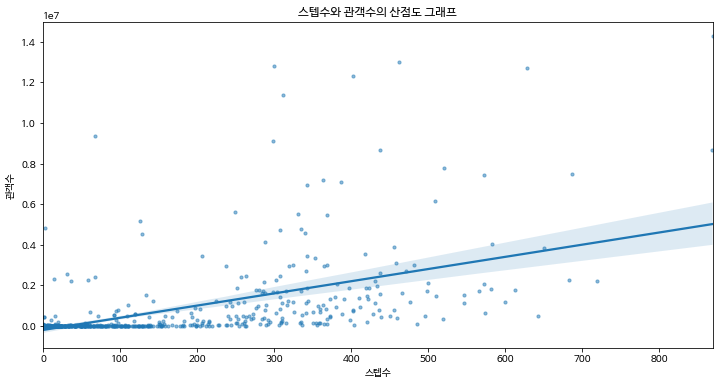

In [44]:
# 스텝수와 관객수 사이의 관계를 보기 위한 산점도 그래프 그리기

ax = plt.subplots(figsize = (12, 6))
ax = sns.regplot(x = 'num_staff', y = 'box_off_num', data = train, scatter_kws = {'s': 10, 'alpha': 0.5})
ax.set_title("스텝수와 관객수의 산점도 그래프")
ax.set_xlabel("스텝수")
ax.set_ylabel("관객수")

- 산점도 그래프를 통해 스텝수가 증가하면 대체적으로 관객수가 증가하는 경향성을 확인할 수 있다. 회귀선 또한 양의 기울기를 갖는다.

In [45]:
# 스텝수와 관객수의 상관계수 계산

train['num_staff'].corr(train['box_off_num'], method='pearson') # 두 개의 열 상관계수 계산

0.5442647163889159

- 상관계수를 구해보면 + 0.54의 값이 나온다. 따라서 스텝수와 관객수는 뚜렷한 양의 상관관계를 가짐을 알 수 있다.
- 스텝수가 많은 경우는 제작비가 많이 들어가는 상업영화이므로, 보통 스텝수가 적은 독립영화에 비해 관객수가 많다고 해석할 수 있다.

# 6) 모델 적합

- 우리는 데이터를 모델에 적합시켜, 관객 수를 예측하고자 한다.
- 따라서 관객 수가 target 값이고 그 외의 칼럼이 feature이다.
- feature가 너무 많으면 모델 적합의 효과가 떨어질 수 있기 때문에 관객 수에 영향을 미치는 주요 칼럼만 선택하여 feature로 지정한다.
- 모델 적합 시 숫자형이 아닌 데이터를 원-핫 인코딩으로 가공해준다.

In [46]:
# train 데이터의 상관계수 확인

train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.0,0.3,0.3,0.6,0.1,0.4
dir_prev_bfnum,0.3,1.0,0.4,0.4,0.0,0.3
dir_prev_num,0.3,0.4,1.0,0.5,0.0,0.3
num_staff,0.6,0.4,0.5,1.0,0.1,0.5
num_actor,0.1,0.0,0.0,0.1,1.0,0.1
box_off_num,0.4,0.3,0.3,0.5,0.1,1.0


In [47]:
# feature와 target에 해당하는 칼럼 지정

features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'screening_rat']
target = ['box_off_num']

In [48]:
# train_data와 test_data 생성

train_data = train[features]
test_data = test[features]

In [49]:
# 관객 수에 로그 변환 적용

train_target = np.log1p(train[target]) 

In [50]:
# 상영 등급은 범주형 변수이므로 원-핫 인코딩 수행

train_data = pd.get_dummies(columns = ['screening_rat'], data = train_data)
test_data = pd.get_dummies(columns = ['screening_rat'], data = test_data)

In [58]:
# 배우 수에 로그 변환 적용

train_data['num_actor'] = np.log1p(train_data['num_actor'])
test_data['num_actor'] = np.log1p(test_data['num_actor'])

In [60]:
# 교차검증 적용

from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle = True, random_state = 23)

### 6-1) LightGBM

In [62]:
from lightgbm import LGBMRegressor

# LGBMRegressor 모델 생성 
lgbm = LGBMRegressor(n_estimators = 500, random_state = 0) # n_estimators = 500으로 하이퍼 파라미터 튜닝

# 모델 학습 수행 및 RMSE 계산
from sklearn.metrics import mean_squared_error
rmse_list = []
lgbm_pred = np.zeros((test.shape[0]))

for idx1, idx2 in kf.split(train_data, train_target) :
    X_train, y_train = train_data.iloc[idx1], train_target.iloc[idx1]
    X_test, y_test = train_data.iloc[idx2], train_target.iloc[idx2]
    
    lgbm.fit(X_train, y_train)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(X_test)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(test_data)])
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    rmse_list.append(rmse)
    
    lgbm_pred += (sub_pred / 10)

In [63]:
# RMSE 값 평균 확인

np.mean(rmse_list)

1640408.2101639616

### 6-2) XGBoost

In [70]:
from xgboost import XGBRegressor

# XGBRegressor 모델 생성 
xgb = XGBRegressor(n_estimators = 500, random_state = 0) # n_estimators = 500으로 하이퍼 파라미터 튜닝

# 모델 학습 수행 및 RMSE 계산
from sklearn.metrics import mean_squared_error
rmse_list = []
xgb_pred = np.zeros((test.shape[0]))

for idx1, idx2 in kf.split(train_data, train_target) :
    X_train, y_train = train_data.iloc[idx1], train_target.iloc[idx1]
    X_test, y_test = train_data.iloc[idx2], train_target.iloc[idx2]
    
    xgb.fit(X_train, y_train)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(X_test)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(test_data)])
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

In [71]:
# RMSE 값 평균 확인

np.mean(rmse_list)

1486437.5529603274

### 6-3) RandomForest

In [72]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 생성 
rf = RandomForestRegressor(n_estimators = 500, random_state = 0) # n_estimators = 500으로 하이퍼 파라미터 튜닝

# 모델 학습 수행 및 RMSE 계산
from sklearn.metrics import mean_squared_error
rmse_list = []
rf_pred = np.zeros((test.shape[0]))

for idx1, idx2 in kf.split(train_data, train_target) :
    X_train, y_train = train_data.iloc[idx1], train_target.iloc[idx1]
    X_test, y_test = train_data.iloc[idx2], train_target.iloc[idx2]
    
    rf.fit(X_train, y_train)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(X_test)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(test_data)])
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 10)

In [73]:
# RMSE 값 평균 확인

np.mean(rmse_list)

861951.4072861153

### 6-4) GradientBoosting

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

# GradientBoostingRegressor모델 생성 
gbm = GradientBoostingRegressor(n_estimators = 500, random_state = 0) # n_estimators = 500으로 하이퍼 파라미터 튜닝

# 모델 학습 수행 및 RMSE 계산
from sklearn.metrics import mean_squared_error
rmse_list = []
gbm_pred = np.zeros((test.shape[0]))

for idx1, idx2 in kf.split(train_data, train_target) :
    X_train, y_train = train_data.iloc[idx1], train_target.iloc[idx1]
    X_test, y_test = train_data.iloc[idx2], train_target.iloc[idx2]
    
    gbm.fit(X_train, y_train)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(X_test)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(test_data)])
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    rmse_list.append(rmse)
    
    gbm_pred += (sub_pred / 10)

In [78]:
# RMSE 값 평균 확인

np.mean(rmse_list)

1477339.4356618752

- 네 가지 모델의 RMSE 값 평균을 비교해본 결과, 값이 가장 작은 RandomForest가 성능이 가장 좋다.

### 6-5) 관측 수 예측 결과 도출

In [82]:
# 세 가지 모델로 예측한 관객수의 평균을 제출용 파일의 관객 수에 추가

submission['box_off_num'] = (lgbm_pred + xgb_pred + rf_pred + gbm_pred) / 4

In [83]:
# 결과 확인

submission.head()

,title,box_off_num
0,용서는 없다,7810670.3
1,아빠가 여자를 좋아해,557524.4
2,하모니,503228.1
3,의형제,972764.7
4,평행 이론,1781022.3


In [84]:
# 결과 csv 파일로 저장

submission.to_csv("final_result.csv", index = False)